<a href="https://colab.research.google.com/github/RoaldKhairov/BehavioralDataAnalysis/blob/main/The%20causal%20behavioral%20framework/BehavioralAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt # Для калькуляции V Крамера
from scipy.stats import chi2_contingency # Для калькуляции V Крамера

In [ ]:
survey_data_url = 'https://raw.githubusercontent.com/RoaldKhairov/BehavioralDataAnalysis/main/The%20causal%20behavioral%20framework/chap1-survey_data.csv'
stand_data_url = 'https://raw.githubusercontent.com/RoaldKhairov/BehavioralDataAnalysis/main/The%20causal%20behavioral%20framework/chap1-stand_data.csv'

survey_data_pre = pd.read_csv(survey_data_url)
stand_data_pre = pd.read_csv(stand_data_url)

stand_data = stand_data_pre[stand_data_pre['icecream_sales'] >= 0]

**stand_data** описание

* IceCreamSales - Ежедневные продажи мороженого в киосках C-Mart
* IcedCoffeeSales - Ежедневные продажи холодного кофе в киосках C-Mart
* SummerMonth - Двоичная переменная, которая относит день к летним месяцам
* Temp - Средняя температура за этот день и у этого киоска по фаренгейту

In [ ]:
stand_data.head(1)

,icecream_sales,iced_coffee_sales,summer_months,temps
0,38519.423382,43753.760447,0,43.644356


**survey_data** описание:

* Vanilla Taste - Пристрастие опрашиваемого к ванильному вкусу, 0–25
* ChocTaste - Пристрастие опрашиваемого к шоколадному вкусу, 0–25
* Shopped - Двоичная переменная, которая указывает на то, что опрашиваемый когда-либо совершал покупки в местном киоске C-Mart

# Каузация != Корреляция

Компания считает, что
на ежедневные продажи мороженого влияет погода – т.е. погода является причиной продаж.

Подвердим мысль корреляцией.

Коэф. корреляции: 0.9471781752830036


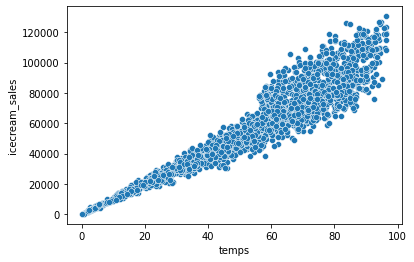

In [ ]:
# Температура vs продажи

sns.scatterplot(x='temps', y='icecream_sales', data=stand_data)
print('Коэф. корреляции:', stand_data['temps'].corr(stand_data['icecream_sales']))

Исходя из этого умозаключения, мы может предпологать рост продаж при повышении температуры. 

Воспользуемся регрессионым уровнением для прогноза.

In [ ]:
print(ols("icecream_sales ~ temps", data=stand_data).fit().summary())

                            OLS Regression Results                            
Dep. Variable:         icecream_sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                 2.081e+04
Date:                Wed, 15 Jun 2022   Prob (F-statistic):               0.00
Time:                        20:52:41   Log-Likelihood:                -25058.
No. Observations:                2388   AIC:                         5.012e+04
Df Residuals:                    2386   BIC:                         5.013e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4686.2137    463.364    -10.113      0.0

Каждый дополнительный градус температуры, как ожидается, будет увеличивать продажи мороженого на 1147 долларов. Также, значение продаж мороженого при температуре ноль градусов составляет **–4686**, что уже не имеет смысла.

Следуя этой модели, руководство ожидало роста продаж во время потепления осенью, но его не произошло. Дело в том, что продажи мороженного обычно резко выростают в период школьных каникул (которые приходяться на летнее время). Т.е. помимо температуры, есть и зависимоть от месяца.

Месяц года – это спутывающий фактор. Переменная, которая вносит систематическое смещение в регрессию. 
Интерпретация коэффициента регрессии в данном случаи как причинноследственного будет приводить к ненадлежащим выводам. 

Добавим факт летнего месяца и еще продаж холодного кофе

In [ ]:
# Добавим переменные летнего месяца и продаж кофе
print(ols("icecream_sales ~ temps + summer_months + iced_coffee_sales", data=stand_data).fit().summary())

                            OLS Regression Results                            
Dep. Variable:         icecream_sales   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                 1.715e+04
Date:                Wed, 15 Jun 2022   Prob (F-statistic):               0.00
Time:                        20:53:12   Log-Likelihood:                -24052.
No. Observations:                2388   AIC:                         4.811e+04
Df Residuals:                    2384   BIC:                         4.813e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            22.8715    315.53

Истина, лежащая в  основе данных (которая специально сгенерирована искуственно), заключается в том, что, когда становится жарко, люди
с большей вероятностью покупают холодный кофе. В жаркие дни люди также
с большей вероятностью покупают больше мороженого. Но покупка холодного кофе сама по себе не делает покупателей более или менее склонными
покупать мороженое. Летние месяцы также не коррелируют с  покупками
холодного кофе, поскольку школьники не являются существенным фактором
спроса на холодный кофе

# Фундаментальные структуры причинно-следственных диаграмм

In [3]:
hotel_booking_url = 'https://raw.githubusercontent.com/RoaldKhairov/BehavioralDataAnalysis/main/The%20causal%20behavioral%20framework/chap4-hotel_booking_case_study.csv'

hotel_booking = pd.read_csv(hotel_booking_url)

описание **hotel_booking**: 

В этом разделе мы будем работать с набором реально существующих данных
о бронировании гостиничных номеров в двух гостиницах, расположенных
в одном городе

* NRDeposit - Двоичная 0/1, имела ли бронь невозвратный депозит
* IsCanceled - Двоичная 0/1, была бронь аннулирована или нет
* DistributionChannel - Категориальная переменная со значениями «Прямой»,
«Корпоративный», «Турагент/турорганизация», «Другой»
* CustomerType - Категориальная переменная со значениями «Транзитный»,
«Транзитная сторона», «Контрактный», «Групповой»
* MarketSegment - Категориальная переменная со значениями «Прямой»,
«Корпоративный», «Онлайновый турагент» «Офлановый
турагент/турорганизация», «Групповой», «Другой»
* Children - Целочисленная, число детей в брони
* Average Daily Rate - Числовая, среднесуточная стоимость номера, итоговая
сумма брони / число дней
* PreviousCancellation - Двоичная 0/1, аннулировал клиент бронь раньше или нет
IsRepeatedGuest (ПостоянныйГость) Двоичная 0/1, бронировал ли клиент раньше номер в гостинице
* Country - Категориальная, страна происхождения заказчика
Quarter (Квартал) Категориальная, квартал бронирования
* Year - Целочисленная, год бронирования

In [4]:
hotel_booking.head(1)

,NRDeposit,IsCanceled,DistributionChannel,MarketSegment,CustomerType,Children,ADR,PreviousCancellations,IsRepeatedGuest,Country,Quarter,Year
0,0,0,Direct,Direct,Transient,0,0.0,0,0,PRT,Q3,2015


####**Проблема**

Попытаемся ответить на вопрос «Влияет ли тип
депозита на частоту аннулирования брони?»

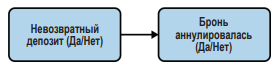

In [5]:
table_cnt = hotel_booking.groupby(['NRDeposit', 'IsCanceled']).\
agg(cnt = ('Country', lambda x: len(x)))
print(table_cnt)
table_pct = table_cnt.groupby(level=0).apply(lambda x: 100 * x/float(x.sum()))
print(table_pct)

                        cnt
NRDeposit IsCanceled       
0         0           63316
          1           23042
1         0              55
          1             982
                            cnt
NRDeposit IsCanceled           
0         0           73.318048
          1           26.681952
1         0            5.303761
          1           94.696239


Подавляющее большинство броней не имеют депозита,
а частота аннулирования составляет около 27 %. При бронировании с невозвратными депозитами очень высока частота
аннулирования брони, что сильно удивляет.

Возможно, что с  большей долей вероятности гостиницы запрашивают
невозвратные депозиты в  ситуациях «высокорисковых» броней.

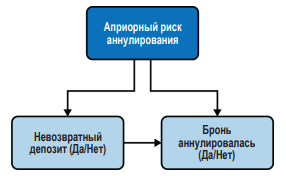

Разложим на все возможные факторы, которые у нас есть. Наблюдаемые переменные разрезаны на категориальные (слева от причинно-следственной диаграммы) и числовые (справа от причинноследственной диаграммы). Эти два типа данных требуют разных квантитативных инструментов, поэтому мы рассмотрим их по очереди.

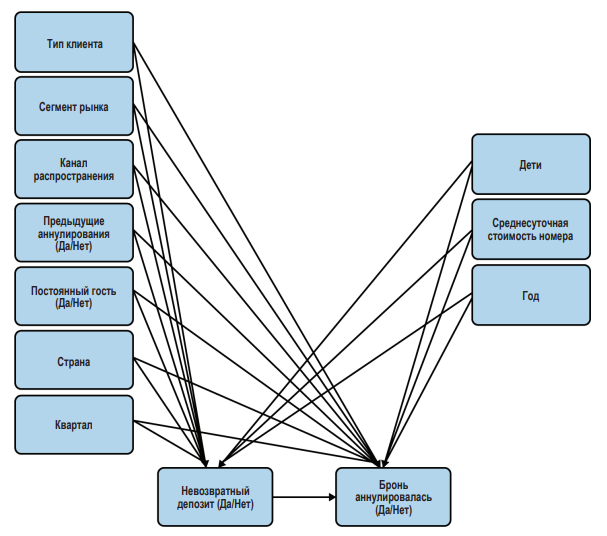

Построим матрицу корреляций для всех числовых (включая бинарные, но вообще так нельзя делать) переменных в  наших данных. 

             NRDep    IsCanc  Children       ADR   PrevCan    RepGst      Year
NRDep     1.000000  0.164958 -0.032703 -0.040040  0.149858 -0.016099 -0.019110
IsCanc    0.164958  1.000000  0.060165  0.133467  0.126891 -0.089640  0.088037
Children -0.032703  0.060165  1.000000  0.339825 -0.028195 -0.047242  0.034155
ADR      -0.040040  0.133467  0.339825  1.000000 -0.073385 -0.161620  0.186587
PrevCan   0.149858  0.126891 -0.028195 -0.073385  1.000000  0.246987 -0.119020
RepGst   -0.016099 -0.089640 -0.047242 -0.161620  0.246987  1.000000  0.024342
Year     -0.019110  0.088037  0.034155  0.186587 -0.119020  0.024342  1.000000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


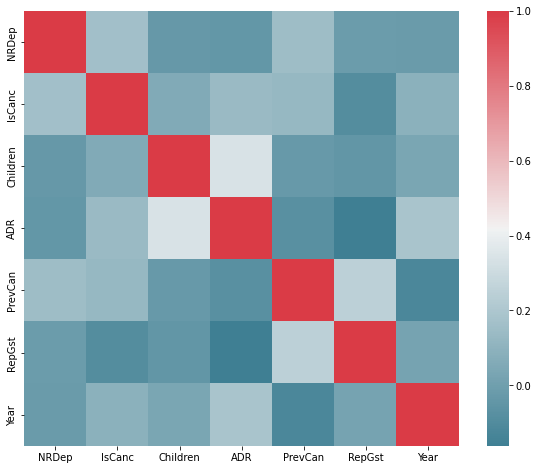

In [9]:
#Сокр. названия столбцов
hotel_booking.rename(columns=
              {"CustomerType": "CustTyp",
               "DistributionChannel": "DistCh",
               "IsRepeatedGuest": "RepGst",
               "MarketSegment": "MktSgmt",
               "IsCanceled": "IsCanc",
               "PreviousCancellations": "PrevCan",
               "NRDeposit": "NRDep"},
              inplace=True)

#Данные только с числовыми и бинарными переменными
num_hotel_booking = hotel_booking.copy().select_dtypes(include=['int64', 'float64'])
num_hotel_booking.columns

#Creating the correlation matrix for numerical and binary variables only
num_corr = num_hotel_booking.corr()
print(num_corr)

f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(num_corr, mask=np.zeros_like(num_corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)



*Прим. Я так и не понял как он из этой таблицы корреляции вывел схему ниже. Вчитаться еще раз потом.*

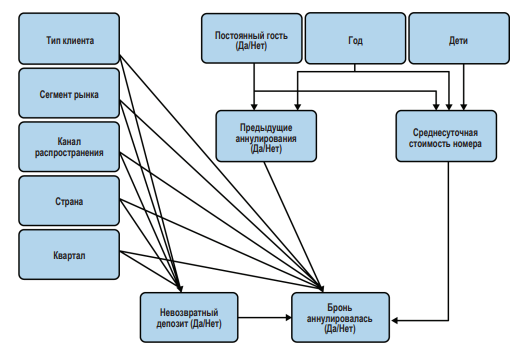